# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [35]:
# Mengambil Dataset yang sudah Diberi Label dengan Nama 'Cluster' Hasil Proses Clustering
df = pd.read_csv('https://raw.githubusercontent.com/rahmahff/projek_2/refs/heads/main/hasil_clustering.csv')
df.head()

,TransactionAmount,TransactionDuration,CustomerAge,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,Cluster
0,14.09,81.0,70,0,1,1,0,0,0
1,376.24,141.0,68,0,1,1,0,0,0
2,126.29,56.0,19,0,1,0,0,1,1
3,184.50,25.0,26,0,1,0,0,1,1
4,13.45,198.0,26,1,0,0,0,1,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [36]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1851, 8), y_train=(1851,)
Test set shape: X_test=(463, 8), y_test=(463,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [37]:
# Memilih Algoritma Klasifikasi yaitu Random Forest dan Support Vector Machine (SVM)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Untuk algoritma yang digunakan itu terdapat dua macam yaitu:
- Random Forest, digunakan karena pada dasarnya dapat meningkatkan akurasi terhadap nilai yang di prediksi serta dapat mengurangi dari resiko terjadinya overfitting.
- Support Vector Machine (SVM), digunakan karena untuk dapat mencari hyperplane yang optimal untuk memisahkan setiap data dalam kelas yang berbeda.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [38]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus (Testing)
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        'Confusion Matrix': metrics['Confusion Matrix']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision   Recall  F1-Score  \
0            Random Forest (RF)  1.000000   1.000000  1.00000  1.000000   
1  Support Vector Machine (SVM)  0.993521   0.991416  0.99569  0.993548   

       Confusion Matrix  
0  [[231, 0], [0, 232]]  
1  [[229, 2], [1, 231]]  


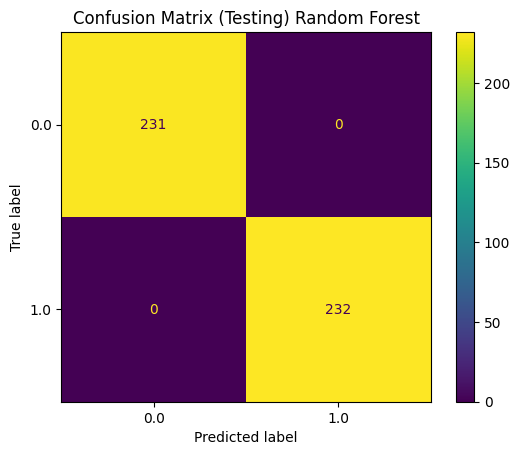

In [39]:
# Tampilan Confusion Matrix - Testing (RF)
predictions_rf_ts = rf.predict(X_test)
cm_rf_ts = confusion_matrix(y_test, predictions_rf_ts, labels=rf.classes_)
display_rf_ts = ConfusionMatrixDisplay(confusion_matrix=cm_rf_ts, display_labels=rf.classes_)
display_rf_ts.plot()
plt.title('Confusion Matrix (Testing) Random Forest')
plt.show()

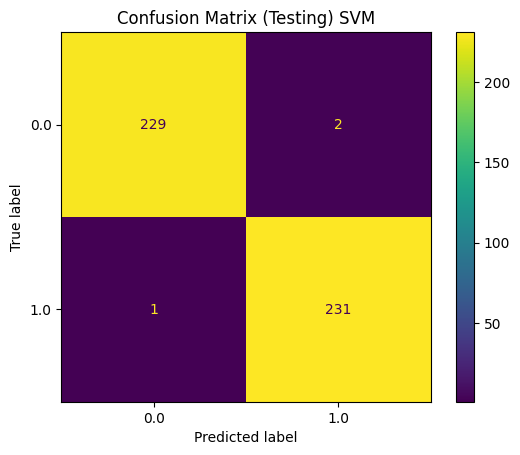

In [40]:
# Tampilan Confusion Matrix - Testing (SVM)
predictions_svc_ts = svm.predict(X_test)
cm_svc_ts = confusion_matrix(y_test, predictions_svc_ts, labels=svm.classes_)
display_svc_ts = ConfusionMatrixDisplay(confusion_matrix=cm_svc_ts, display_labels=svm.classes_)
display_svc_ts.plot()
plt.title('Confusion Matrix (Testing) SVM')
plt.show()

In [41]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus (Training)
def evaluate_model(model, X_train, y_train):
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_train, y_pred),
        'Precision': precision_score(y_train, y_pred),
        'Recall': recall_score(y_train, y_pred),
        'F1-Score': f1_score(y_train, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Random Forest (RF)': evaluate_model(rf, X_train, y_train),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_train, y_train),
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        'Confusion Matrix': metrics['Confusion Matrix']
    })

# Konversi daftar kamus ke DataFrame
summary_df_train = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df_train)

                          Model  Accuracy  Precision    Recall  F1-Score  \
0            Random Forest (RF)  1.000000    1.00000  1.000000  1.000000   
1  Support Vector Machine (SVM)  0.992437    0.99888  0.985635  0.992214   

        Confusion Matrix  
0   [[946, 0], [0, 905]]  
1  [[945, 1], [13, 892]]  


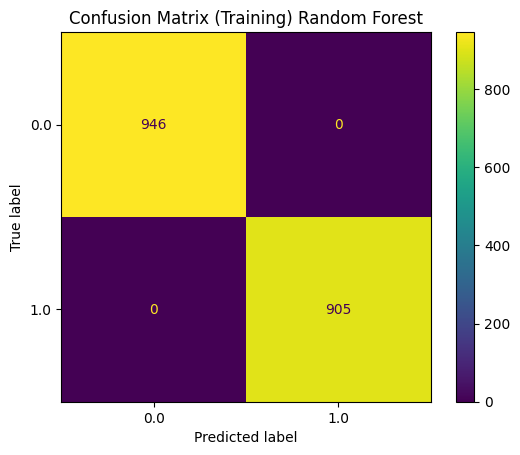

In [42]:
# Tampilan Confusion Matrix - Training (RF)
predictions_rf_tr = rf.predict(X_train)
cm_rf_tr = confusion_matrix(y_train, predictions_rf_tr, labels=rf.classes_)
display_rf_tr = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tr, display_labels=rf.classes_)
display_rf_tr.plot()
plt.title('Confusion Matrix (Training) Random Forest')
plt.show()

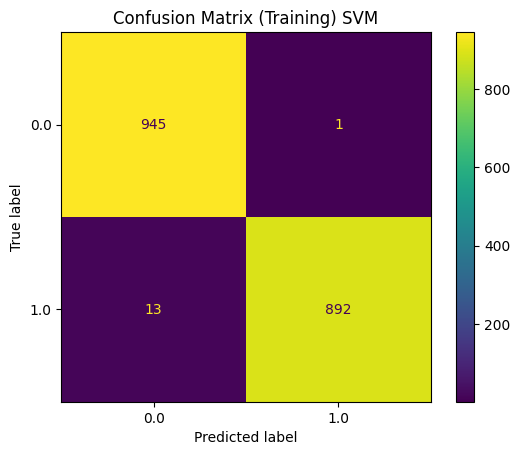

In [43]:
# Tampilan Confusion Matrix - Training (SVM)
predictions_svc_tr = svm.predict(X_train)
cm_svc_tr = confusion_matrix(y_train, predictions_svc_tr, labels=svm.classes_)
display_svc_tr = ConfusionMatrixDisplay(confusion_matrix=cm_svc_tr, display_labels=svm.classes_)
display_svc_tr.plot()
plt.title('Confusion Matrix (Training) SVM')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Hasil Evaluasi Algoritma**
- **Random Forest:**
  - **Hasil Testing:** Algoritma ini menunjukkan hasil akurasi sebesar 100%. Adapun memiliki precision 100%, recall 100%, dan F1-Score 100%. Angka ini menunjukkan hasil yang sempurna serta memiliki performa sempurna seperti pada nilai confusion matrix.
  - **Hasil Training:** Algoritma ini menunjukkan hasil akurasi sebesar 100%. Adapun memiliki nilai precision 100%, recall 100%, dan F1-Score 100%. Angka ini menunjukkan hasil yang sempurna serta memiliki performa yang sempurna juga.
- **Support Vector Machine (SVM):**
  - **Hasil Testing:** Algoritma ini pula menunjukkan hasil akurasi sebesar 99.35%. Adapun memiliki precision 99.14%, recall 99.56%, dan F1-Score 99.35%. Angka ini menunjukkan hasil yang cukup sempurna serta memiliki performa yang baik dengan nilai akurasi dan F1-Score yang sama dan cukup tinggi mendekati sempurna.
  - **Hasil Training:** Algoritma ini menunjukkan hasil akurasi sebesar 99.24%. Adapun memiliki nilai precision sebesar 99.88%, recall 98.56%, dan F1-Score 99.22%. Angka ini menunjukkan hasil yang cukup sempurna juga, dapat ditinjau dari nilai akurasi dan F1-Score yang cukup tinggi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Hasil Evaluasi**:
Untuk perbandingan setiap algoritma yaitu untuk nilai precision dan recall pada Random Forest lebih unggul dibandingkan dengan pada algoritma SVM, dengan masing-masing nilainya sebesar 100%. Dalam hal ini pula pada hasil confusion matrix untuk proses testing menunjukkan bahwa pada Random Forest nilai true positive yaitu 232. Untuk confusion matrix pada SVM menunjukkan hasil true positive yaitu 231 dan 229 untuk true negatif. Meskipun begitu terdapat kesalahan prediksi pada confusion matrix SVM. Kemudian, nilai yang sempurna pada hasil Random Forest ini bisa memungkinkan untuk terjadinya overfitting. Untuk rekomendasi tindakan lanjut bisa melakukan penambahan data latih supaya tidak terjadinya overfitting serta mencoba untuk menguji data dengan algoritma lainnya.